# [作業目標]
- 請同學試著使用 pandas.corr() 這個函數來顯示相關係數並加以觀察結果 
- 思考1 : 使用 pandas 有沒有什麼寫法, 可以顯示欄位中最大的幾筆, 以及最小幾筆呢? (Hint: 排序後列出前幾筆/後幾筆)
- 思考2 : 試著使用散佈圖, 顯示相關度最大/最小的特徵與目標值的關係, 如果圖形不明顯, 是否有調整的方法?

# [作業重點]
- 綜合前幾單元的作法, 試試看是否能夠用繪圖顯示出特徵與目標的相關性

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

### 相關係數
一樣，pandas 很貼心地讓我們可以非常容易計算相關係數

In [5]:
# 觀察相關係數
app_train.corr()['TARGET']

SK_ID_CURR                    -0.002108
TARGET                         1.000000
NAME_CONTRACT_TYPE            -0.030896
FLAG_OWN_CAR                  -0.021851
FLAG_OWN_REALTY               -0.006148
CNT_CHILDREN                   0.019187
AMT_INCOME_TOTAL              -0.003982
AMT_CREDIT                    -0.030369
AMT_ANNUITY                   -0.012817
AMT_GOODS_PRICE               -0.039645
REGION_POPULATION_RELATIVE    -0.037227
DAYS_BIRTH                    -0.078239
DAYS_EMPLOYED                  0.074958
DAYS_REGISTRATION              0.041975
DAYS_ID_PUBLISH                0.051457
OWN_CAR_AGE                    0.037612
FLAG_MOBIL                     0.000534
FLAG_EMP_PHONE                 0.045982
FLAG_WORK_PHONE                0.028524
FLAG_CONT_MOBILE               0.000370
FLAG_PHONE                    -0.023806
FLAG_EMAIL                    -0.001758
CNT_FAM_MEMBERS                0.009308
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893


## 練習時間
列出目標 (TARGET) 與所有欄位之間相關係數，數值最大以及最小各 15 個

通過相關係數的結果觀察有興趣的欄位與 TARGET 或其他欄位的相關係數，並嘗試找出有趣的訊息
- 最好的方式當然是畫圖，舉例來說，我們知道  EXT_SOURCE_3 這個欄位和 TARGET 之間的相關係數是 -0.178919 (在已經這個資料集已經是最負的了！)，那我們可以 EXT_SOURCE_3  為 x 軸， TARGET 為 y 軸，把資料給畫出來

In [6]:
# series打包index與value
corr_list=app_train.corr()['TARGET']
type(corr_list)

pandas.core.series.Series

In [7]:
# test
# 取出series的值就是numpy array才能排序
np.sort(corr_list.values.round(3))

array([-0.179, -0.16 , -0.155, -0.078, -0.046, -0.044, -0.044, -0.043,
       -0.04 , -0.037, -0.034, -0.034, -0.034, -0.033, -0.033, -0.033,
       -0.033, -0.033, -0.032, -0.031, -0.031, -0.03 , -0.029, -0.029,
       -0.029, -0.027, -0.025, -0.025, -0.024, -0.024, -0.023, -0.023,
       -0.022, -0.022, -0.022, -0.022, -0.022, -0.02 , -0.019, -0.019,
       -0.019, -0.019, -0.017, -0.016, -0.014, -0.013, -0.013, -0.013,
       -0.012, -0.012, -0.012, -0.011, -0.011, -0.01 , -0.01 , -0.01 ,
       -0.009, -0.009, -0.008, -0.008, -0.007, -0.006, -0.004, -0.004,
       -0.004, -0.003, -0.003, -0.003, -0.003, -0.002, -0.002, -0.002,
       -0.002, -0.002, -0.001, -0.001, -0.001, -0.   ,  0.   ,  0.   ,
        0.001,  0.001,  0.001,  0.003,  0.003,  0.004,  0.005,  0.006,
        0.007,  0.009,  0.009,  0.009,  0.019,  0.02 ,  0.029,  0.031,
        0.032,  0.033,  0.038,  0.042,  0.044,  0.044,  0.046,  0.051,
        0.051,  0.055,  0.059,  0.061,  0.075,  1.   ])

#### 1.列出目標 (TARGET) 與所有欄位之間相關係數，數值最大以及最小各 15 個

In [26]:
aa=np.sort(corr_list.values)

In [27]:
# 最小15個值
aa[0:15]

array([-0.1789187 , -0.16047167, -0.15531713, -0.07823931, -0.04598708,
       -0.04400337, -0.04376792, -0.04322626, -0.03964528, -0.03722715,
       -0.03419879, -0.03386288, -0.0336135 , -0.03339429, -0.03299712])

In [37]:
# 最大15個值
aa[-15:]

array([0.03127647, 0.03224758, 0.03251834, 0.03761156, 0.04197486,
       0.04434635, 0.04439537, 0.04598222, 0.05099446, 0.05145717,
       0.05521848, 0.05889901, 0.06089267, 0.07495846, 1.        ])

In [41]:
# 最小15個值及欄位
corr_list[corr_list<=aa[14]]

AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
DAYS_BIRTH                   -0.078239
EXT_SOURCE_1                 -0.155317
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_3                 -0.178919
ELEVATORS_AVG                -0.034199
FLOORSMAX_AVG                -0.044003
FLOORSMIN_AVG                -0.033614
LIVINGAREA_AVG               -0.032997
FLOORSMAX_MODE               -0.043226
ELEVATORS_MEDI               -0.033863
FLOORSMAX_MEDI               -0.043768
FLOORSMIN_MEDI               -0.033394
DAYS_EMPLOYED_ANOM           -0.045987
Name: TARGET, dtype: float64

In [40]:
corr_list[corr_list>= aa[-15]]

TARGET                         1.000000
DAYS_EMPLOYED                  0.074958
DAYS_REGISTRATION              0.041975
DAYS_ID_PUBLISH                0.051457
OWN_CAR_AGE                    0.037612
FLAG_EMP_PHONE                 0.045982
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
REG_CITY_NOT_LIVE_CITY         0.044395
REG_CITY_NOT_WORK_CITY         0.050994
LIVE_CITY_NOT_WORK_CITY        0.032518
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
DAYS_LAST_PHONE_CHANGE         0.055218
FLAG_DOCUMENT_3                0.044346
Name: TARGET, dtype: float64

#### 2.試著使用散佈圖, 顯示相關度最大/最小的特徵與目標值的關係, 如果圖形不明顯, 是否有調整的方法?

In [18]:
# 找出最負相關的(-0.179)是哪個欄位
# series用masking找到最負相關的欄位
corr_list[corr_list==corr_list.min()]

EXT_SOURCE_3   -0.178919
Name: TARGET, dtype: float64

In [8]:
app_train['EXT_SOURCE_3']

0         0.139376
1              NaN
2         0.729567
3              NaN
4              NaN
5         0.621226
6         0.492060
7         0.540654
8         0.751724
9              NaN
10        0.363945
11        0.652897
12        0.176653
13        0.770087
14             NaN
15        0.678568
16        0.062103
17             NaN
18        0.556727
19        0.477649
20             NaN
21        0.542445
22        0.358951
23        0.669057
24        0.565608
25        0.461482
26        0.190706
27        0.659406
28        0.524496
29             NaN
            ...   
307481    0.511892
307482    0.394495
307483    0.520898
307484         NaN
307485    0.865896
307486    0.199771
307487    0.255332
307488    0.529890
307489    0.397946
307490    0.495666
307491    0.716570
307492    0.365617
307493    0.728141
307494    0.511892
307495    0.597192
307496    0.486653
307497    0.524496
307498    0.406617
307499    0.206779
307500    0.337673
307501         NaN
307502    0.

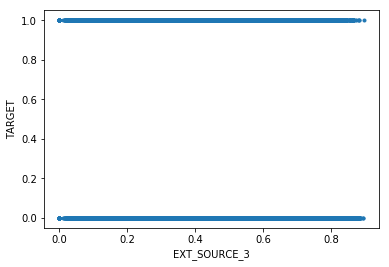

Correlation: nan


In [9]:
# 散點圖-相關度最小的欄位與目標值的關係
plt.plot(app_train['EXT_SOURCE_3'],app_train['TARGET'],'.')
plt.xlabel('EXT_SOURCE_3')
plt.ylabel('TARGET')
plt.show()
corr = np.corrcoef(app_train['EXT_SOURCE_3'], app_train['TARGET'])
print("Correlation: %.4f" % (corr[0][1]))

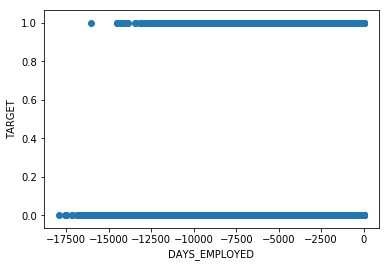

In [42]:
# 散點圖-相關度最大的欄位與目標值的關係
fig=plt.figure()
ax=plt.axes()
ax.scatter(app_train['DAYS_EMPLOYED'],app_train['TARGET'])
ax.set_xlabel('DAYS_EMPLOYED')
ax.set_ylabel('TARGET')
plt.show()